# Tổng quan cái bước Visualize
# 

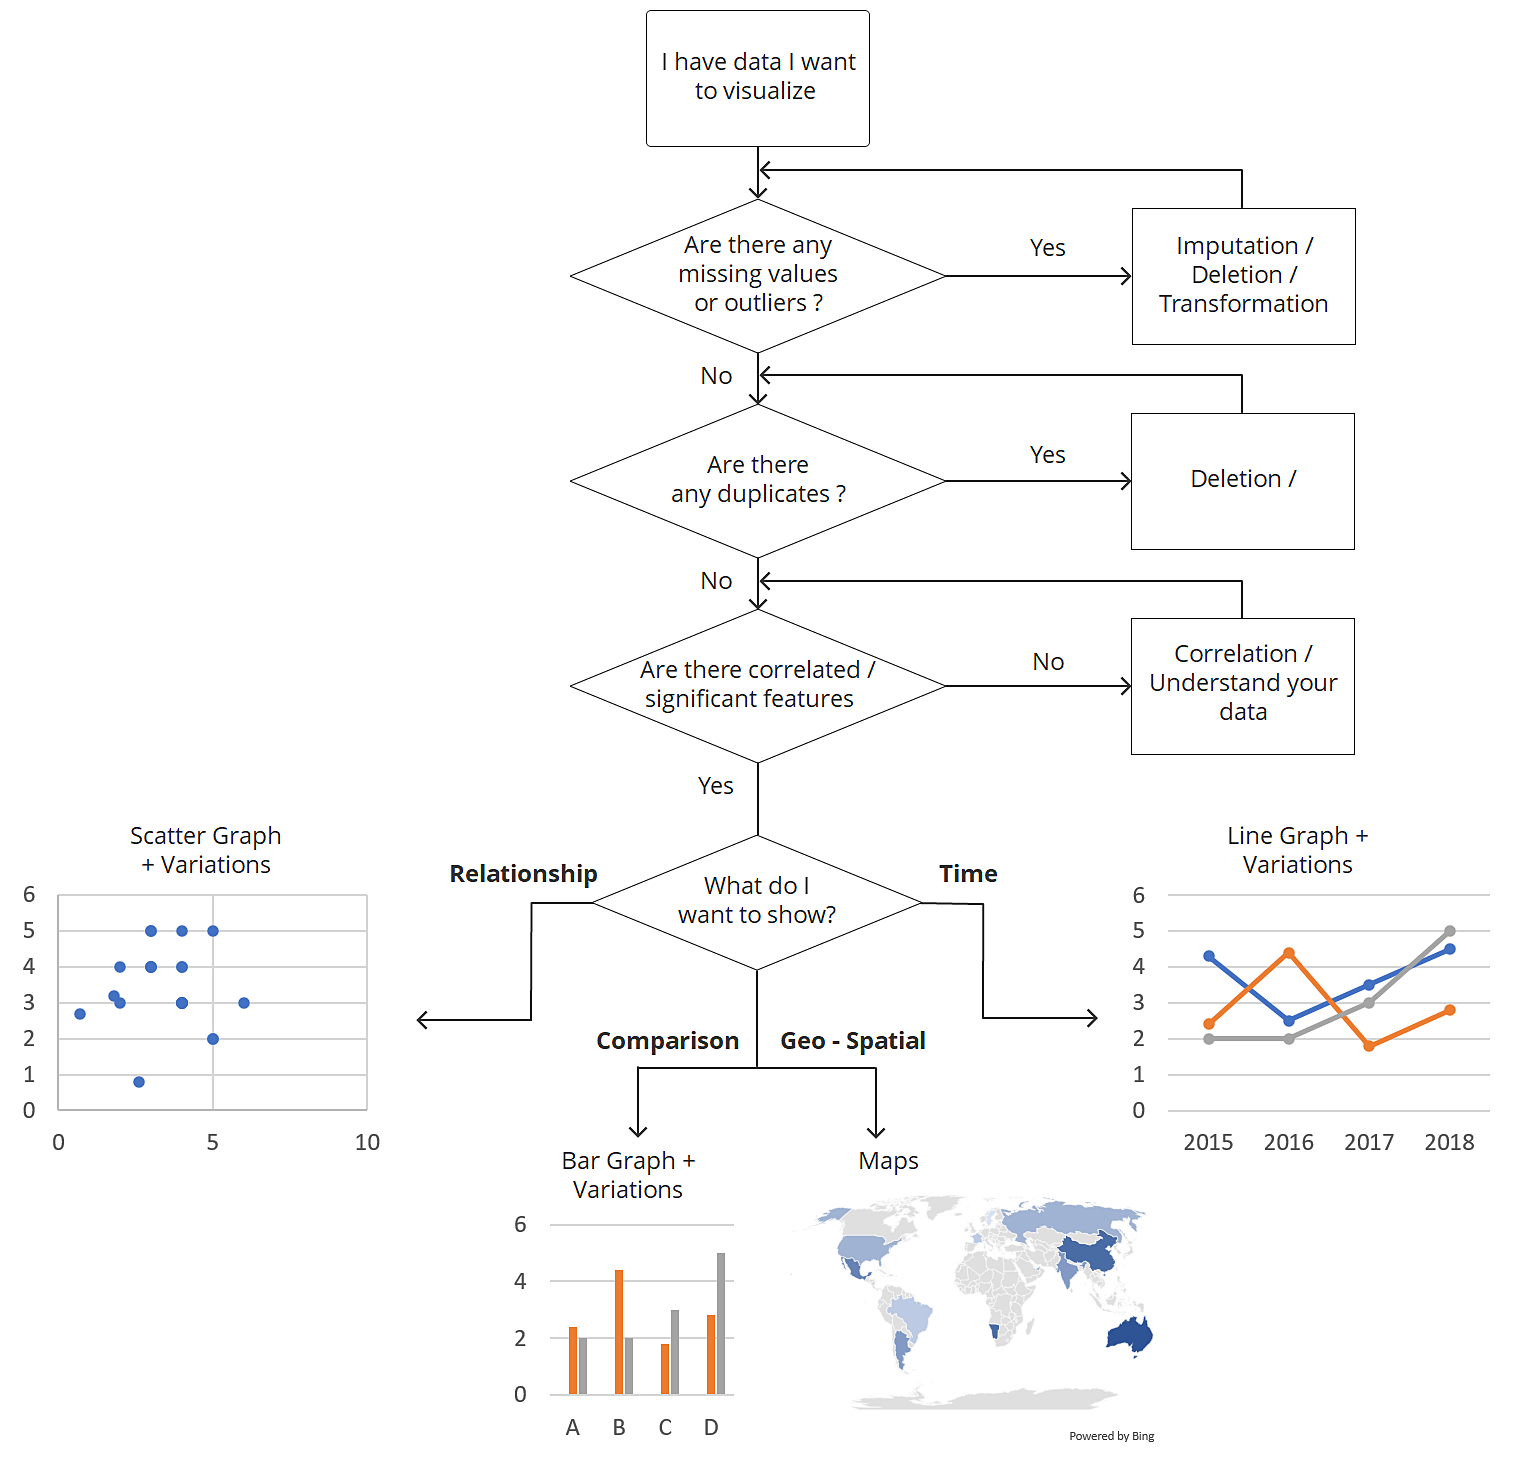

In [37]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('Cheat Sheet.png')
cv2_imshow(img)

In [ ]:
# Outlier and mising value

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px

In [85]:
# dataset gym
name_file = 'gym.csv'

gym = pd.read_csv(name_file)
gym.head()

,age,weight,sex
0,29,88,2
1,45,96,1
2,35,91,0
3,37,790,1
4,27,62,0


In [86]:
gym.describe()

,age,weight,sex
count,543.000000,543.000000,543.000000
mean,44.119705,76.622468,1.051565
std,16.189219,34.842439,0.815618
min,17.000000,46.000000,0.000000
25%,30.000000,61.000000,0.000000
50%,44.000000,76.000000,1.000000
75%,58.000000,90.000000,2.000000
max,72.000000,790.000000,2.000000


In [39]:
fig = px.box(gym, x = 'sex', y = 'weight', notched = True)
fig.show()

In [ ]:
# Từ biểu đồ trên thì xác định được outlier là điểm có w = 790,
# Lấy những data có w <= 103

In [41]:
gym['weight'] <104

0      True
1      True
2      True
4      True
5      True
       ... 
538    True
539    True
540    True
541    True
542    True
Name: weight, Length: 542, dtype: bool

In [88]:
# Delete, - Delete w > 103
gym = gym[gym['weight'] < 104]
gym.head()

,age,weight,sex
0,29,88,2
1,45,96,1
2,35,91,0
4,27,62,0
5,58,55,0


In [89]:
gym.describe()

,age,weight,sex
count,542.000000,542.000000,542.000000
mean,44.132841,75.306273,1.051661
std,16.201278,16.547649,0.816368
min,17.000000,46.000000,0.000000
25%,30.000000,61.000000,0.000000
50%,44.000000,76.000000,1.000000
75%,58.000000,90.000000,2.000000
max,72.000000,103.000000,2.000000


In [43]:
fig1 = px.box(gym, x = 'sex', y = 'weight', notched = True)
fig1.show()

In [44]:
# Inputation
# Dataset weight
name_w = 'weight.csv'
w = pd.read_csv(name_w)
w.describe()

,weight,sex
count,62.000000,62.000000
mean,33.887097,0.838710
std,15.683451,0.813685
min,0.000000,0.000000
25%,25.000000,0.000000
50%,35.000000,1.000000
75%,46.000000,1.750000
max,56.000000,2.000000


In [47]:
# check missing value
w.weight.isna().sum()

0

In [48]:
w

,weight,sex
0,47,2
1,0,1
2,35,0
3,34,1
4,0,0
...,...,...
57,38,1
58,32,0
59,44,1
60,53,2


In [49]:
# Deletion
# Xóa các records có  weight = 0
doc_w = w[w['weight'] != 0]
doc_w.describe()

,weight,sex
count,55.00000,55.000000
mean,38.20000,0.836364
std,10.49056,0.811118
min,21.00000,0.000000
25%,31.00000,0.000000
50%,36.00000,1.000000
75%,46.50000,1.500000
max,56.00000,2.000000


In [12]:
fig1 = px.box(doc_w, x = 'sex', y = 'weight', notched = True)
fig1.show()

In [13]:
mean_w = doc_w['weight'].mean()
mean_w

38.2

In [50]:
# Inputation weight = 0 -> mean.
w_new = w.replace({'weight': {0:mean_w}})
w_new.describe()

,weight,sex
count,62.000000,62.000000
mean,38.200000,0.838710
std,9.870307,0.813685
min,21.000000,0.000000
25%,31.250000,0.000000
50%,38.100000,1.000000
75%,46.000000,1.750000
max,56.000000,2.000000


In [51]:
fig2 = px.box(w_new, x = 'sex', y = 'weight', notched = True)
fig2.show()

In [ ]:
# Tính mean của weight của từng category sex (0,1,2)
# Weight của sex nào = 0 thì thay bằng mean của sex.
# Khi gặp time series: Thay bằng giá trị trước đó hoặc sau đó.
# Sum, median,
# ...
# Dùng model.



In [52]:
!pip install Faker
from random import choice
from faker import Faker


In [58]:
fake = Faker()
fake.name()

'Megan Snyder'

In [66]:
name_fake = [fake.name() for itr in range(50)]

In [69]:
name_db = pd.DataFrame()
name_db['name'] = [choice(name_fake) for itr in range(len(w_new))]

In [70]:
name_db['name'].duplicated().sum()

26

In [71]:
# > 0 : chứng tỏ có duplicates
name_db[name_db['name'].duplicated()]

,name
17,Katherine Blair
18,Michelle Bond
21,Valerie Knight
22,Hannah Reyes
25,Mitchell Miller
26,Austin Duran
30,Hannah Reyes
31,Carla Andrews
34,Carla Andrews
37,Erin Willis


In [72]:
name_db[name_db['name'] == 'Katherine Blair']

,name
6,Katherine Blair
17,Katherine Blair


In [77]:
name_db.drop_duplicates(subset = ['name'], inplace = True)
len(name_db)

36

In [ ]:
# Confusing

In [23]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.9 MB/s 


In [24]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objs as go

In [78]:
name_co2 = 'co2.csv'
name_gm = 'gapminder.csv'
co2 = pd.read_csv(name_co2)
gm = pd.read_csv(name_gm)


In [79]:
co2.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.169,0.155,0.183,0.163,0.168,0.133,0.152,0.165,0.204,0.235,0.298,0.271,0.272,0.248,0.236,0.213,0.188,0.0997,0.0891,0.080,0.0727,0.066,0.0597,0.0552,0.0423,0.0385,0.039,0.0487,0.0518,0.0394,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.910,2.010,2.270,2.530,2.890,1.930,2.680,2.620,2.680,2.700,2.660,2.650,2.380,2.290,2.760,1.680,1.310,0.7760,0.7320,0.613,0.6720,0.652,0.4990,0.5650,0.9580,0.9680,1.030,1.2000,1.3800,1.3400,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.920,2.280,2.370,3.430,2.430,3.440,2.330,1.910,2.480,3.250,3.230,3.280,3.520,3.410,3.170,2.970,2.980,2.9500,2.9600,3.050,3.3000,3.300,2.9200,3.5300,2.9900,2.8200,2.670,2.8100,2.8300,2.7000,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.470,7.180,6.9100,6.7400,6.490,6.6600,7.070,7.2400,7.6600,7.9800,8.0200,7.790,7.5900,7.3200,7.3600,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.575,0.416,0.435,0.646,0.637,0.599,0.571,0.485,0.515,0.487,0.443,0.427,0.518,0.446,0.424,0.420,0.405,0.4010,0.4310,0.281,0.7690,0.712,0.4890,0.4710,0.5740,0.5800,0.573,0.7210,0.4980,0.9960,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


In [80]:
gm.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [81]:
# Tiền xử lý dữ liêu (có trong các bài thực hành trước)
df_gm = gm[['Country', 'region']].drop_duplicates()
df_w_regions = pd.merge(co2, df_gm, left_on='country', right_on='Country', how='inner')
df_w_regions = df_w_regions.drop('Country', axis='columns')
new_co2 = pd.melt(df_w_regions, id_vars=['country', 'region'])

columns = ['country', 'region', 'year', 'co2']
new_co2.columns = columns

df_co2 = new_co2[new_co2['year'].astype('int64') > 1963]
df_co2 = df_co2.sort_values(by=['country', 'year'])
df_co2['year'] = df_co2['year'].astype('int64')
df_g = gm[['Country', 'Year', 'gdp', 'population', 'fertility', 'life']]
df_g.columns = ['country', 'year', 'gdp', 'population', 'fertility', 'life']
data = pd.merge(df_co2, df_g, on=['country', 'year'], how='left')

data = data.dropna() # Drop missing value

In [82]:
data

,country,region,year,co2,gdp,population,fertility,life
0,Afghanistan,South Asia,1964,0.0863,1182.0,10474903.0,7.671,33.639
1,Afghanistan,South Asia,1965,0.1010,1182.0,10697983.0,7.671,34.152
2,Afghanistan,South Asia,1966,0.1080,1168.0,10927724.0,7.671,34.662
3,Afghanistan,South Asia,1967,0.1240,1173.0,11163656.0,7.671,35.170
4,Afghanistan,South Asia,1968,0.1160,1187.0,11411022.0,7.671,35.674
...,...,...,...,...,...,...,...,...
8817,Zimbabwe,Sub-Saharan Africa,2009,0.4060,1352.0,12473992.0,3.792,51.234
8818,Zimbabwe,Sub-Saharan Africa,2010,0.5520,1484.0,12571454.0,3.721,53.684
8819,Zimbabwe,Sub-Saharan Africa,2011,0.6650,1626.0,12754378.0,3.643,56.040
8820,Zimbabwe,Sub-Saharan Africa,2012,0.5300,1750.0,13013678.0,3.564,58.142


In [83]:
# Confussing
source = [
    go.Bar(x = data['region'], 
          y = data.co2[data['year'] == 1970]), 
    go.Bar(x = data['region'], 
          y = data.co2[data['year'] == 1980]), 
    go.Bar(x = data['region'], 
          y = data.co2[data['year'] == 1990]),
    go.Bar(x = data['region'], 
          y = data.co2[data['year'] == 2000]),
    go.Bar(x = data['region'], 
          y = data.co2[data['year'] == 2010]),
]

layout = go.Layout(barmode = 'stack')

fig = go.Figure(source, layout)

fig.show()

# Bài tập

In [91]:
data

,country,region,year,co2,gdp,population,fertility,life
0,Afghanistan,South Asia,1964,0.0863,1182.0,10474903.0,7.671,33.639
1,Afghanistan,South Asia,1965,0.1010,1182.0,10697983.0,7.671,34.152
2,Afghanistan,South Asia,1966,0.1080,1168.0,10927724.0,7.671,34.662
3,Afghanistan,South Asia,1967,0.1240,1173.0,11163656.0,7.671,35.170
4,Afghanistan,South Asia,1968,0.1160,1187.0,11411022.0,7.671,35.674
...,...,...,...,...,...,...,...,...
8817,Zimbabwe,Sub-Saharan Africa,2009,0.4060,1352.0,12473992.0,3.792,51.234
8818,Zimbabwe,Sub-Saharan Africa,2010,0.5520,1484.0,12571454.0,3.721,53.684
8819,Zimbabwe,Sub-Saharan Africa,2011,0.6650,1626.0,12754378.0,3.643,56.040
8820,Zimbabwe,Sub-Saharan Africa,2012,0.5300,1750.0,13013678.0,3.564,58.142


1.

 a) Dùng dataset co2.csv, và grapminder.csv. Thực hiện lại các bước tiền xử lý dự liệu.

 b) Vẽ biểu đồ biểu thị mỗi quan hệ giữa co2 và life sử dụng scatter. Với contry ở hover tool, và slider: year. 

c) Tính correlation giữa co2 vs life

d) Tương tự b,c) nhưng mà cho co2 vs fertility.

e) Tạo 1 barplot visualize co2 mỗi region, mỗi year (slider : year), hover tool : country
